In [1]:
import sounddevice as sd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import scipy.io.wavfile as wav
from scipy.fftpack import fft, ifft, fftfreq
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = [16, 5]

In [2]:
def str2bits(str):
    res = bin(int.from_bytes(str.encode('ascii'), 'big'))[2:]
    return '0'*(8 - (len(res) % 8)) + res

In [3]:
from fsk import SoundCommunication

In [4]:
r = str2bits("hell0!")
sync = ''.join(map(lambda x: str(int(x)), np.random.rand(30) > 0.5))
comm = SoundCommunication(44100, 10, len(r), sync)

from testing import Tester
t = Tester(comm)
S = comm.send(r)

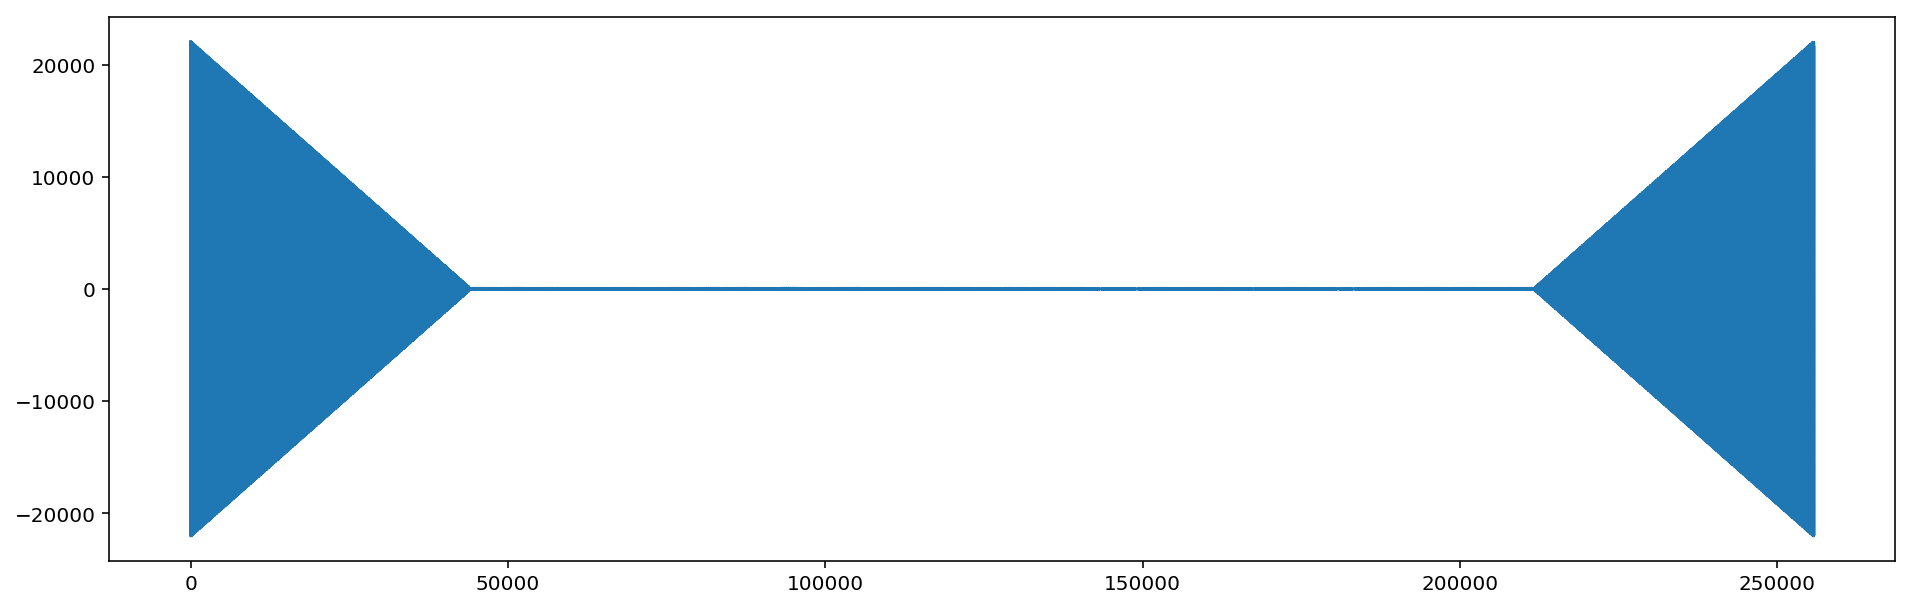

In [5]:
plt.plot(comm._correlate(S, comm.sync))

In [6]:
assert comm.decode(S) == r
assert comm.decode(-S) == r

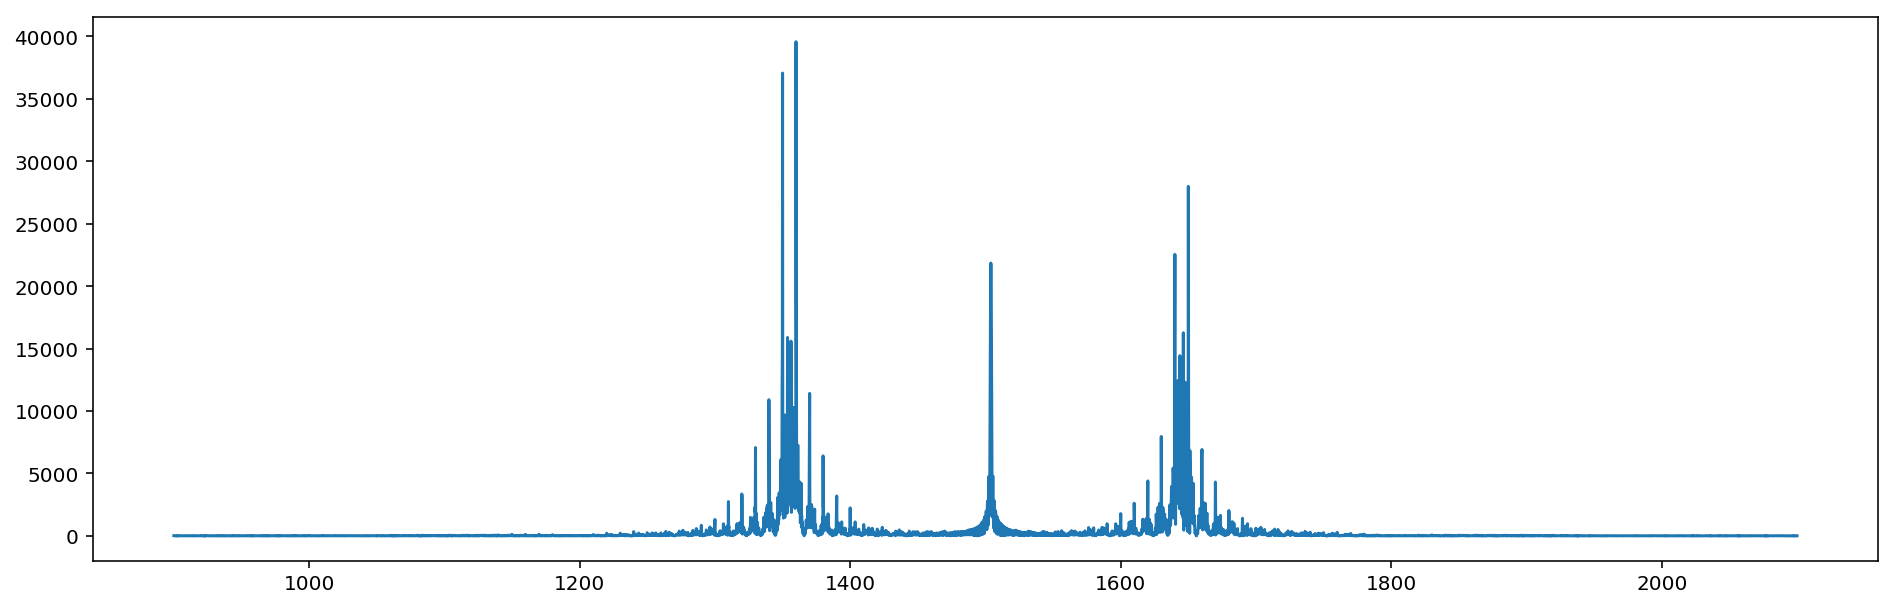

In [7]:
t.plot_frequencies(S)

In [41]:
W = sd.playrec(t.pad(S), channels=1, samplerate=comm.FS).ravel()

In [32]:
sd.play(W)

In [18]:
sd.play(S)

In [33]:
sd.stop()

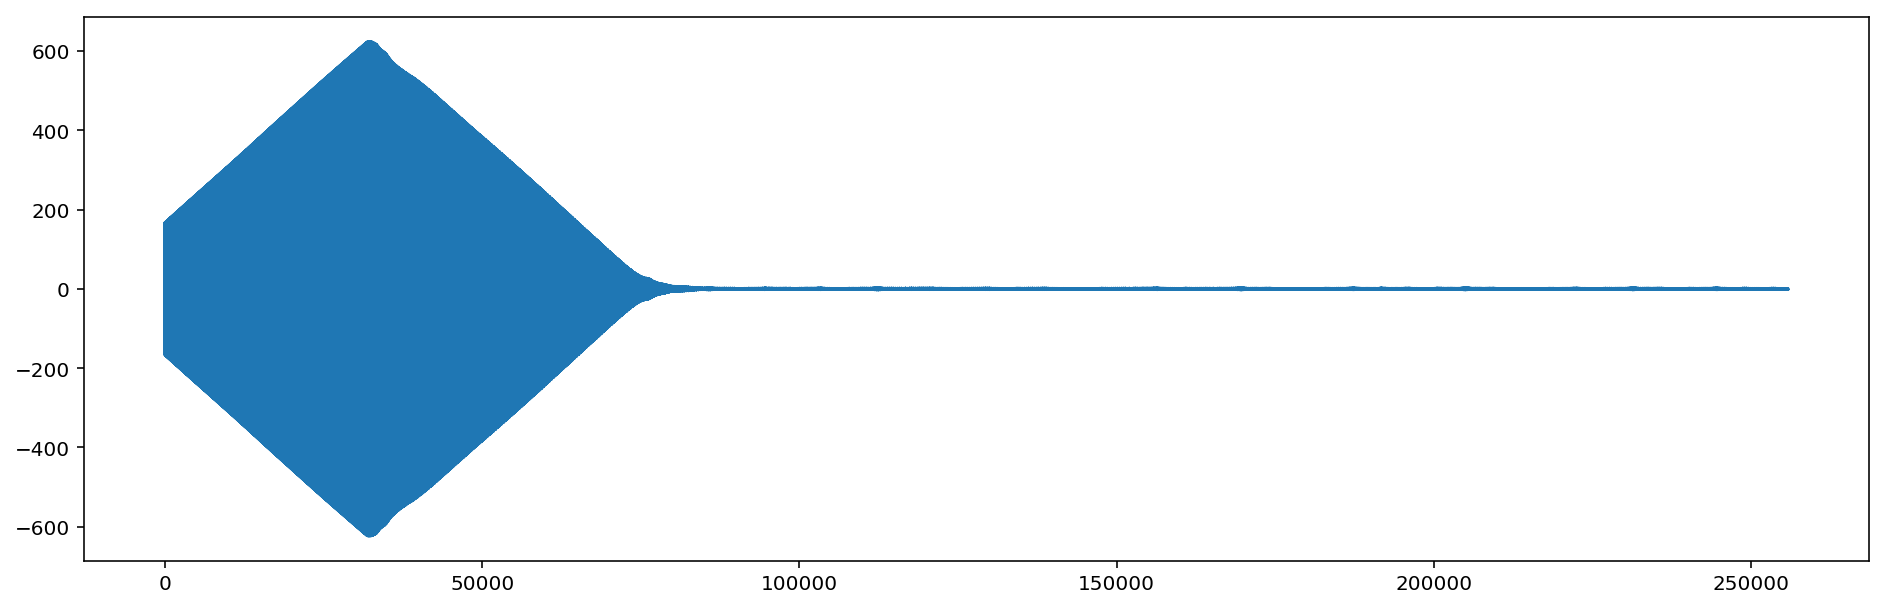

In [42]:
plt.plot(np.correlate(W, comm.sync))

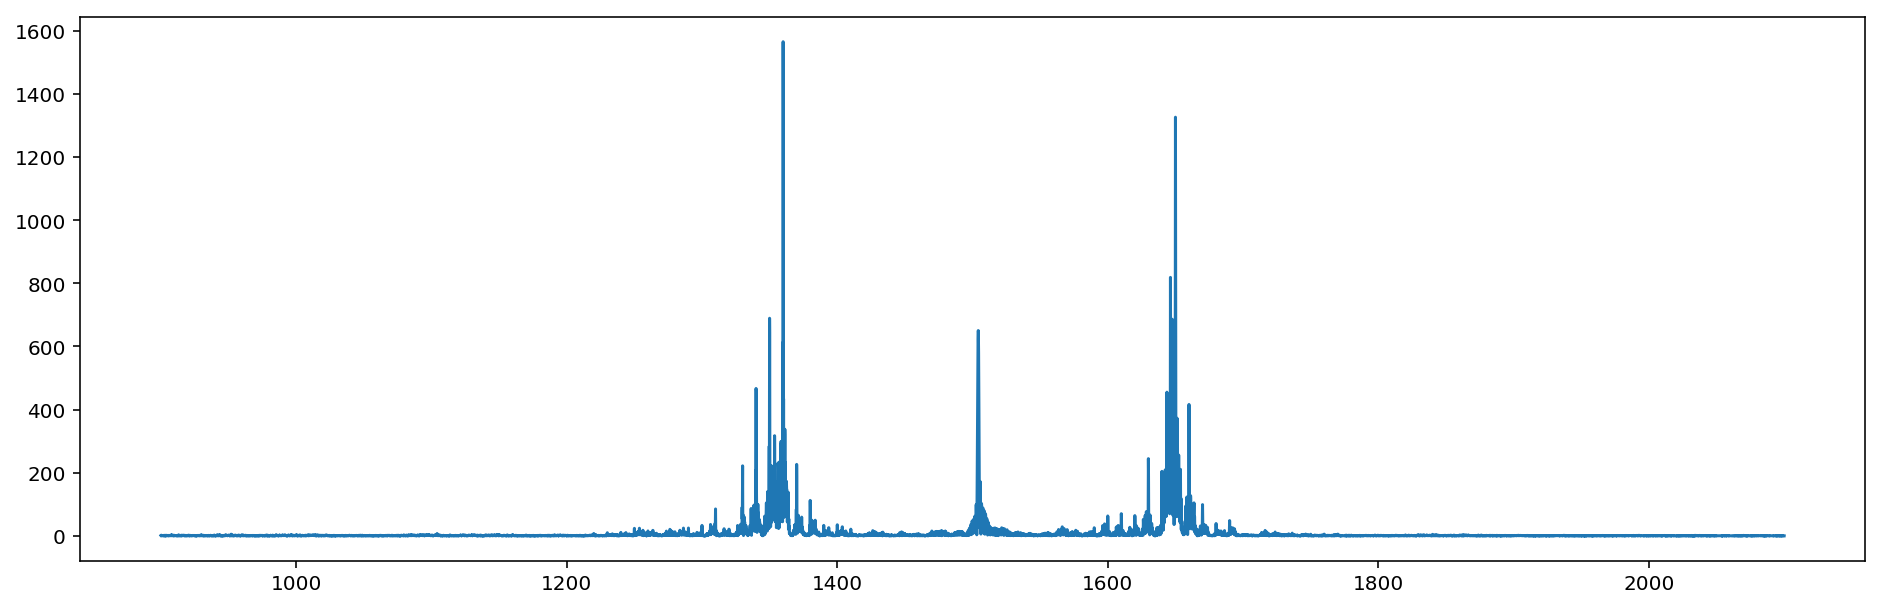

In [43]:
t.plot_frequencies(W)

In [12]:
wav.write('w.wav', data=W, rate=comm.FS)

In [45]:
comm.decode(W)

'011010000000000000000000001010000000000000000000'

In [14]:
r

'011010000110010101101100011011000011000000100001'